<h2 align =center > EDA </h2>

#### The libraries to be used are imported.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Tools as t
from summarytools import dfSummary
import warnings
warnings.filterwarnings('ignore')

#### Data is ingested into a Pandas dataframe.

                                                                                --> Censo del 2020  
https://www.indec.gob.ar/indec/web/Nivel4-CensoProvincia-999-999-02-999-2010    --> Censo del 2010  
https://www.indec.gob.ar/indec/web/Nivel4-CensoProvincia2001-0-999-02-0-2001    --> Censo del 2001

In [2]:
df = pd.read_csv("data/df_accidentes.csv")
df.head()

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,PosX,PosY,Participantes,Victima,Acusado,barrio,Rol,Sexo,Edad,FechaFallecimiento
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,VILLA RIACHUELO,CONDUCTOR,1.0,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,No se encontró el barrio para estas coordenadas.,CONDUCTOR,1.0,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONSTITUCION,CONDUCTOR,1.0,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,VILLA LUGANO,CONDUCTOR,1.0,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONSTITUCION,CONDUCTOR,1.0,29,2016-02-01 00:00:00


The information on the Argentinian population has been obtained over the years through webscrapping (you can read more about it [here](02_WebscrappingPoblacion.ipynb))

In [3]:
df_poblacion = pd.read_csv('data/df_poblacion.csv')
df_poblacion.head()

,Año,Población
0,1779,24205.0
1,1810,44800.0
2,1869,177797.0
3,1895,663854.0
4,1914,1575814.0


#### Missing records

##### Nulls

Null values are searched for in the data frame with a function pre-defined in the Tools.py archive.

In [4]:
nulos = t.PorcentajeNulos(df)
nulos

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [ ]:
#nan = t.ContarRegistrosSD(df, 'nan')
#nan

###### Altura y cruce

In [ ]:
# Establecer el número máximo de filas y columnas a mostrar
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

In [ ]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[537]

LugarHecho              RIVADAVIA AV. Y PERGAMINO
Calle                               RIVADAVIA AV.
Cruce                                   PERGAMINO
DireccionNormalizada    RIVADAVIA AV. y PERGAMINO
Altura                                        NaN
Name: 537, dtype: object

In [ ]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[418]

LugarHecho              Paz, Gral. Av. 11200
Calle                         PAZ, GRAL. AV.
Cruce                                    NaN
DireccionNormalizada    PAZ, GRAL. AV. 11200
Altura                               11200.0
Name: 418, dtype: object

In [ ]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[156]

LugarHecho                  CORDOBA AV. Y CALLAO
Calle                                CORDOBA AV.
Cruce                                 CALLAO AV.
DireccionNormalizada    CORDOBA AV. y CALLAO AV.
Altura                                       NaN
Name: 156, dtype: object

In [ ]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[6]

LugarHecho               NOGOYA Y JOAQUIN V. GONZALES
Calle                                          NOGOYA
Cruce                            GONZALEZ, JOAQUIN V.
DireccionNormalizada    NOGOYA y GONZALEZ, JOAQUIN V.
Altura                                            NaN
Name: 6, dtype: object

In [ ]:
df[['LugarHecho','Calle','Cruce','DireccionNormalizada','Altura']].iloc[647]

LugarHecho               COREA AV. y TORRES Y TENORIO, PRES
Calle                                             COREA AV.
Cruce                               TORRES Y TENORIO, PRES.
DireccionNormalizada    COREA AV. y TORRES Y TENORIO, PRES.
Altura                                                  NaN
Name: 647, dtype: object

After checking some of the records, we can see that if there is a Cruce, there is no Altura and vice versa. Therefore, the records with nulls are not deleted, as they contain important information. Instead, 'Sin Dato' is added to the null record. Also, records with nulls in both the Cruce and Altura columns are searched to find a relationship between them.

In [ ]:
mascara = ( df['Cruce'].isnull() ) & (df['Altura'].isnull())
df[mascara]

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,Calle,Altura,Cruce,DireccionNormalizada,Comuna,PosX,PosY,Participantes,Victima,Acusado,barrio,Rol,Sexo,Edad,FechaFallecimiento
36,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,-58.377146,-34.636575,SD-SD,SD,SD,BARRACAS,SD,NaN,SD,SD
39,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,13,0.000000,0.000000,MOTO-SD,MOTO,SD,No se encontró el barrio para estas coordenadas.,SD,NaN,SD,SD
65,2016-0087,1,2016-07-02,2016,7,3,00:10:00,0,AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y C...,1,-58.378646,-34.629071,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,CONSTITUCION,CONDUCTOR,1.0,23,2016-07-03 00:00:00
72,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,NaN,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,-58.474332,-34.666850,MOTO-CARGAS,MOTO,CARGAS,VILLA LUGANO,CONDUCTOR,1.0,SD,SD
82,2016-0107,1,2016-08-20,2016,8,20,08:22:00,8,AUTOPISTA 9 DE JULIO SUR ALT AV MENDOZA,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y D...,4,-58.371577,-34.654300,MOTO-AUTO,MOTO,AUTO,BARRACAS,CONDUCTOR,1.0,21,SD
92,2016-0118,1,2016-09-04,2016,9,4,03:30:00,3,AUTOPISTA 1 SUR PTE ARTURO FRONDIZI KM 2.9,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,1,-58.379367,-34.626945,AUTO-AUTO,AUTO,AUTO,CONSTITUCION,CONDUCTOR,1.0,27,2016-09-04 00:00:00
102,2016-0130,1,2016-10-04,2016,10,4,12:30:00,12,AUTOPISTA 9 DE JULIO SUR Y AV BRASIL,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI y B...,1,-58.379109,-34.627647,MOTO-CARGAS,MOTO,CARGAS,CONSTITUCION,CONDUCTOR,1.0,29,2016-10-04 00:00:00
108,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,NaN,4,0.000000,0.000000,MOTO-CARGAS,MOTO,CARGAS,No se encontró el barrio para estas coordenadas.,CONDUCTOR,NaN,SD,SD
121,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,NaN,0,0.000000,0.000000,PEATON-SD,PEATON,SD,No se encontró el barrio para estas coordenadas.,PEATON,NaN,SD,SD
129,2016-0160,1,2016-12-06,2016,12,6,05:30:00,5,AUTOPISTA PERITO MORENO ALTURA VELZ,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,NaN,AUTOPISTA PERITO MORENO (ALTURA VELEZ SARSFIELD),9,-58.519272,-34.636358,CARGAS-OBJETO FIJO,CARGAS,OBJETO FIJO,LINIERS,CONDUCTOR,1.0,29,2016-12-06 00:00:00


As you can see, when both columns are nulls, most of the records in TipoDeCalle are Autopista, and this is something we can expect because there is no Altura in Autopista. So in these records the nulls are replaced by 'No cruce' and 'No altura'. There is also a record where TipoDeCalle is Calle and the Altura is in the other column, this record will be filled in manually.

In [ ]:
tipo = df['TipoDeCalle'].iloc[578]
hecho = df['LugarHecho'].iloc[578]
altura = df['Altura'].iloc[578]
cruce = df['Cruce'].iloc[578]
print(f'El tipo de calle es: {tipo} y el lugar de los hechos fue: {hecho}. Y su altura {altura} y cruce son {cruce}.')

El tipo de calle es: CALLE y el lugar de los hechos fue: MURGUIONDO 2700. Y su altura nan y cruce son nan.


In [ ]:
df['Altura'].iloc[578] = 2700

In [ ]:
tipo = df['TipoDeCalle'].iloc[578]
hecho = df['LugarHecho'].iloc[578]
altura = df['Altura'].iloc[578]
cruce = df['Cruce'].iloc[578]
print(f'El tipo de calle es: {tipo} y el lugar de los hechos fue: {hecho}. Y su altura {altura} y cruce son {cruce}.')

El tipo de calle es: CALLE y el lugar de los hechos fue: MURGUIONDO 2700. Y su altura 2700.0 y cruce son nan.


Finally, we search for complete records with no information (not necessarily Nulls).

In [ ]:
mascara =( ( (df['Cruce'].isnull()) & (df['Altura'].isnull()) ) & ( df['LugarHecho'] == 'SD' ) )
df[mascara]

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,Calle,Altura,Cruce,DireccionNormalizada,Comuna,PosX,PosY,Participantes,Victima,Acusado,barrio,Rol,Sexo,Edad,FechaFallecimiento
121,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,NaN,0,0.0,0.0,PEATON-SD,PEATON,SD,No se encontró el barrio para estas coordenadas.,PEATON,NaN,SD,SD


This record will be deleted, and the records will be modified as mentioned before ('Sin Cruce' & 'Sin Altura')

In [ ]:
df.drop(121, inplace=True)
df['Cruce'].fillna('Sin Dato', inplace=True)
df['Altura'].fillna('Sin Dato', inplace=True)

###### DireccionNormalizada

There are 1.12% nulls in the 'DireccionNormalizada' column, but as this is the same information as in the 'LugarHecho' column and this column is complete, the 'DireccionNormalizada' column is deleted.

In [ ]:
df.drop('DireccionNormalizada', axis = 1, inplace = True)
df.head(2)

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,Calle,Altura,Cruce,Comuna,PosX,PosY,Participantes,Victima,Acusado,barrio,Rol,Sexo,Edad,FechaFallecimiento
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Sin Dato,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,VILLA RIACHUELO,CONDUCTOR,1.0,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Sin Dato,DE LOS CORRALES AV.,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,No se encontró el barrio para estas coordenadas.,CONDUCTOR,1.0,70,2016-01-02 00:00:00


###### Sexo

There are 5 records without information in the Sexo column, as it represents less than 1% of the total dataframe, they will be deleted.

In [ ]:
df.dropna(subset=['Sexo'], inplace=True)

In [ ]:
nulos = t.PorcentajeNulos(df)
nulos

,%_valores_nulos,Cantidad_Nulos,Cantidad_NO_Nulos,Total_Registros
idSiniestro,0.0,0,711,711
NumVictimas,0.0,0,711,711
Fecha,0.0,0,711,711
Anio,0.0,0,711,711
Mes,0.0,0,711,711
Dia,0.0,0,711,711
Hora,0.0,0,711,711
H,0.0,0,711,711
LugarHecho,0.0,0,711,711
TipoDeCalle,0.0,0,711,711


There appear to be no empty records left, but a deeper search is performed to find empty values (not necessarily nulls).

##### SD

Records also have 'SD' as a way of saying there's no information, so we count them as nulls.

In [ ]:
sindato = t.ContarRegistros(df, 'SD')
sindato

,Cantidad de SD,%_de_SD,Total_Registros
idSiniestro,0,0.00,711
NumVictimas,0,0.00,711
Fecha,0,0.00,711
Anio,0,0.00,711
Mes,0,0.00,711
Dia,0,0.00,711
Hora,0,0.00,711
H,1,0.14,711
LugarHecho,0,0.00,711
TipoDeCalle,0,0.00,711


Missing data is checked column by column. Information is added or it is decided whether it should be deleted.

###### H

Data in H column will be manually added.

In [ ]:
df[df['H'] == 'SD']

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,Calle,Altura,Cruce,Comuna,PosX,PosY,Participantes,Victima,Acusado,barrio,Rol,Sexo,Edad,FechaFallecimiento
536,2019-0103,1,2019-12-18,2019,12,18,05:12:24,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",Sin Dato,GRIVEO,11,-58.521694,-34.594716,MOTO-MOTO,MOTO,MOTO,VILLA DEVOTO,CONDUCTOR,1.0,24,2019-12-18 00:00:00


In [ ]:
df['H'] = df['H'].replace('SD','5')

The columns Acusado, Victima & Rol with SD values represent less than 5% of the records, so they're eliminated.

In [ ]:
df = df.drop(df[df['Acusado'] == 'SD'].index)
df = df.drop(df[df['Victima'] == 'SD'].index)
df = df.drop(df[df['Rol'] == 'SD'].index)

###### Edad

The Edad column has 6.1% of SD, so to impute the missing records, the null records are filled with the mean of the column. First the datatype is modified to integer.

In [ ]:
df['Edad'].replace('SD', np.nan, inplace=True)
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Edad'] = df['Edad'].astype('float')

The null values are filled with the average age

In [ ]:
promedio = round(df['Edad'].mean(),0)
df['Edad'].fillna(promedio, inplace=True)

#### Duplicated values

Duplicate records are searched for in the dataframe using a function pre-defined in the Tools.py archive.

In [ ]:
filas_duplicadas = df.duplicated(keep=False)
df_duplicados = df[filas_duplicadas]
df_duplicados

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,Calle,Altura,Cruce,Comuna,PosX,PosY,Participantes,Victima,Acusado,barrio,Rol,Sexo,Edad,FechaFallecimiento


There are no duplicated values in the dataframe.

#### Outliers

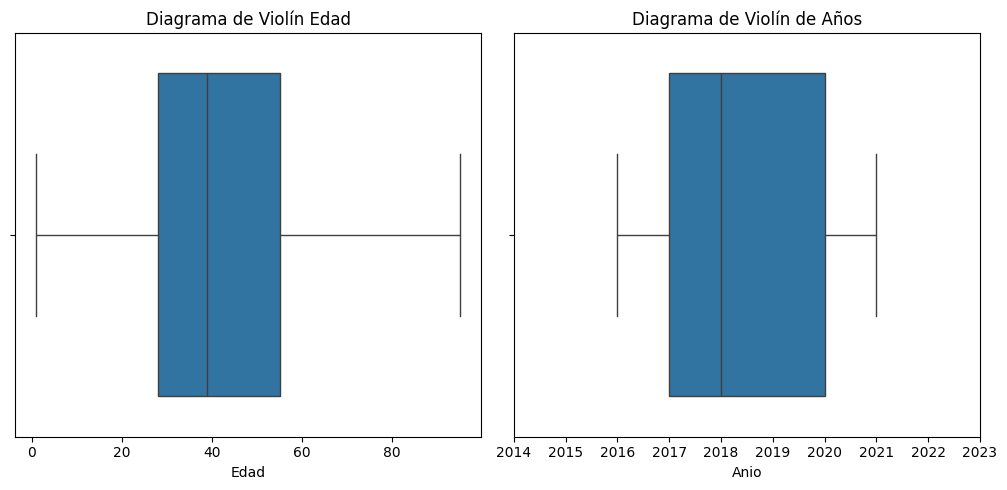

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.boxplot(ax=axes[0], x='Edad', data=df)
axes[0].set_title('Diagrama de Violín Edad')

sns.boxplot(ax=axes[1], x='Anio', data=df)
axes[1].set_title('Diagrama de Violín de Años')
axes[1].set_xlim(2014, 2023)

plt.tight_layout() 
plt.show()

#### Datatypes

#### dfSummary(df)

In [ ]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,idSiniestro[object],1. 2017-00352. 2017-00503. 2017-01124. 2017-01265. 2017-01086. 2020-00387. 2018-01288. 2019-00109. 2017-002610. 2018-002611. other,3 (0.4%)2 (0.3%)2 (0.3%)2 (0.3%)2 (0.3%)2 (0.3%)2 (0.3%)2 (0.3%)2 (0.3%)2 (0.3%)665 (96.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADm0lEQVR4nO3cQWojZxRG0VdGOO1JCSHwEpI9eBG92F6EFpE9GOMaxB1PlEECMenOJNC3QDlnZDT6BxeeDfq8XK/XgcLd3g/g/0NsZMRGRmxkxEZGbGTERkZsZMRGZpmZh5mZ6/X6tvNbuHGH8/n8eWZmWZYvguNHulvX9bSu62lm7vd+DLfN72xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERuawbdvLXz+/7/oSbp4NApnFv8yi4nc2MnfLsvyyLMunvR/C7bubmZ9n5qe9H8Ltc0bJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MjczcyvM/P73g/h9tkgkHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiMjNjLWVWSsq8g4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlMwyMw8zc7/3Q7g579fr9e3jB4fz+fx5XdfTXi/iNm3b9rIsy5ePwR3WdT09PT29HY/Hr3s+jtvx+vr66XK5nJ6fn+9n5u/YZmaOx+PXx8fH33Z7Hbfo4Z8f+AOBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzGHmz6+E7P0Qbse/9XTYtu3lcrmc5jtfCYH/atu2l5l5//iZr4Xzo3zztXDrKjL+QCAjNjJiIyM2MmIjIzYyYiMjNjJiI/MHTYp+Vs//7zEAAAAASUVORK5CYII="">",0(0.0%)
2,NumVictimas[int64],Mean (sd) : 1.1 (0.3)min < med < max:1.0 < 1.0 < 3.0IQR (CV) : 0.0 (4.1),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABvklEQVR4nO3XUWqDUBBG4Zkioi/3IoKLcRFZbBfhbiRcH6INJLdvpaW0iSYl/cP5np1hkEMknnM24L97efQBwDWKSw+4e21m5cb9x5zzvHEW+PBrqO5et227CyE0W5ZP07R391dixa0u/aKWIYSm7/s5xrisWZxSqoZhaMZxLM2MUHGTi59+M7MY49J13WHD/nrDDPANf6YggVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhgVAhoXj0Ac/I3WszKzeOH3PO8z3veQaEemfuXrdtuwshNFvmp2nau/srsX5FqPdXhhCavu/nGOOyZjClVA3D0IzjWJoZoX5CqH8kxrh0XXfYMFrf/ZgncFWoKaVq7eKUUnU6nQozC+6++jBh4Xw+F7yz1d5yzj9+gd4BxxxWd35k+RMAAAAASUVORK5CYII="">",0(0.0%)
3,Fecha[object],1. 2020-12-052. 2016-02-173. 2020-12-254. 2018-12-185. 2018-12-126. 2016-11-267. 2017-12-118. 2016-02-289. 2018-12-2210. 2017-03-2311. other,3 (0.4%)3 (0.4%)3 (0.4%)3 (0.4%)3 (0.4%)3 (0.4%)3 (0.4%)3 (0.4%)3 (0.4%)3 (0.4%)656 (95.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADfUlEQVR4nO3cwWoTUQCG0ZsSit1MCIE8TB6iD+tD5G1CyCxs6SYujCtNFaxfMJ6zEtzM4mMyXu7v4nw+Dyg83PoB+H+IjYzYyIiNjNjIiI2M2MiIjYzYyCzGGE9jjHE+n19u/CzcueVms3keY4zFYvFZcPxND9M0radpWo8xHm/9MNw332xkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY5z/Px8ue3mz4Jd88GgczCf5lFxZuNjHUVGesqMo4+yIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQcS2cjMELGW82MgYvZAxeyDj6ICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxrVwMgYvZHyzkfEzSsa6iox1FRnfbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryLgWTsa6iow3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzLebGQMXsgYvJBx9EFGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryNggkLGuIuPNRsa6iox1FRlHH2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyLgWTsbghYw3GxmDFzIGL2QcfZARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IeNaOBmDFzK+2cj4GSV

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.  

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000  

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.  

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100

#### Analysis

We start analyzing the age and year

<Axes: xlabel='Anio', ylabel='count'>

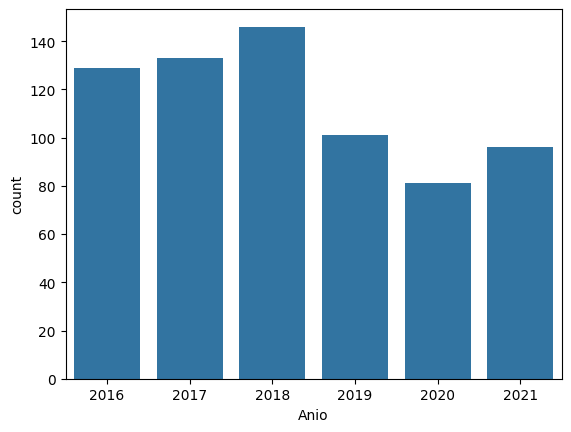

In [ ]:
sns.countplot(data = df, x = 'Anio')

Text(0.5, 0, 'Year')

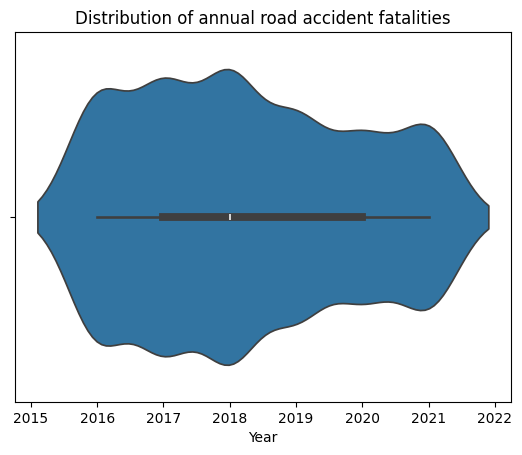

In [ ]:
t.AnnualDistribution(df)

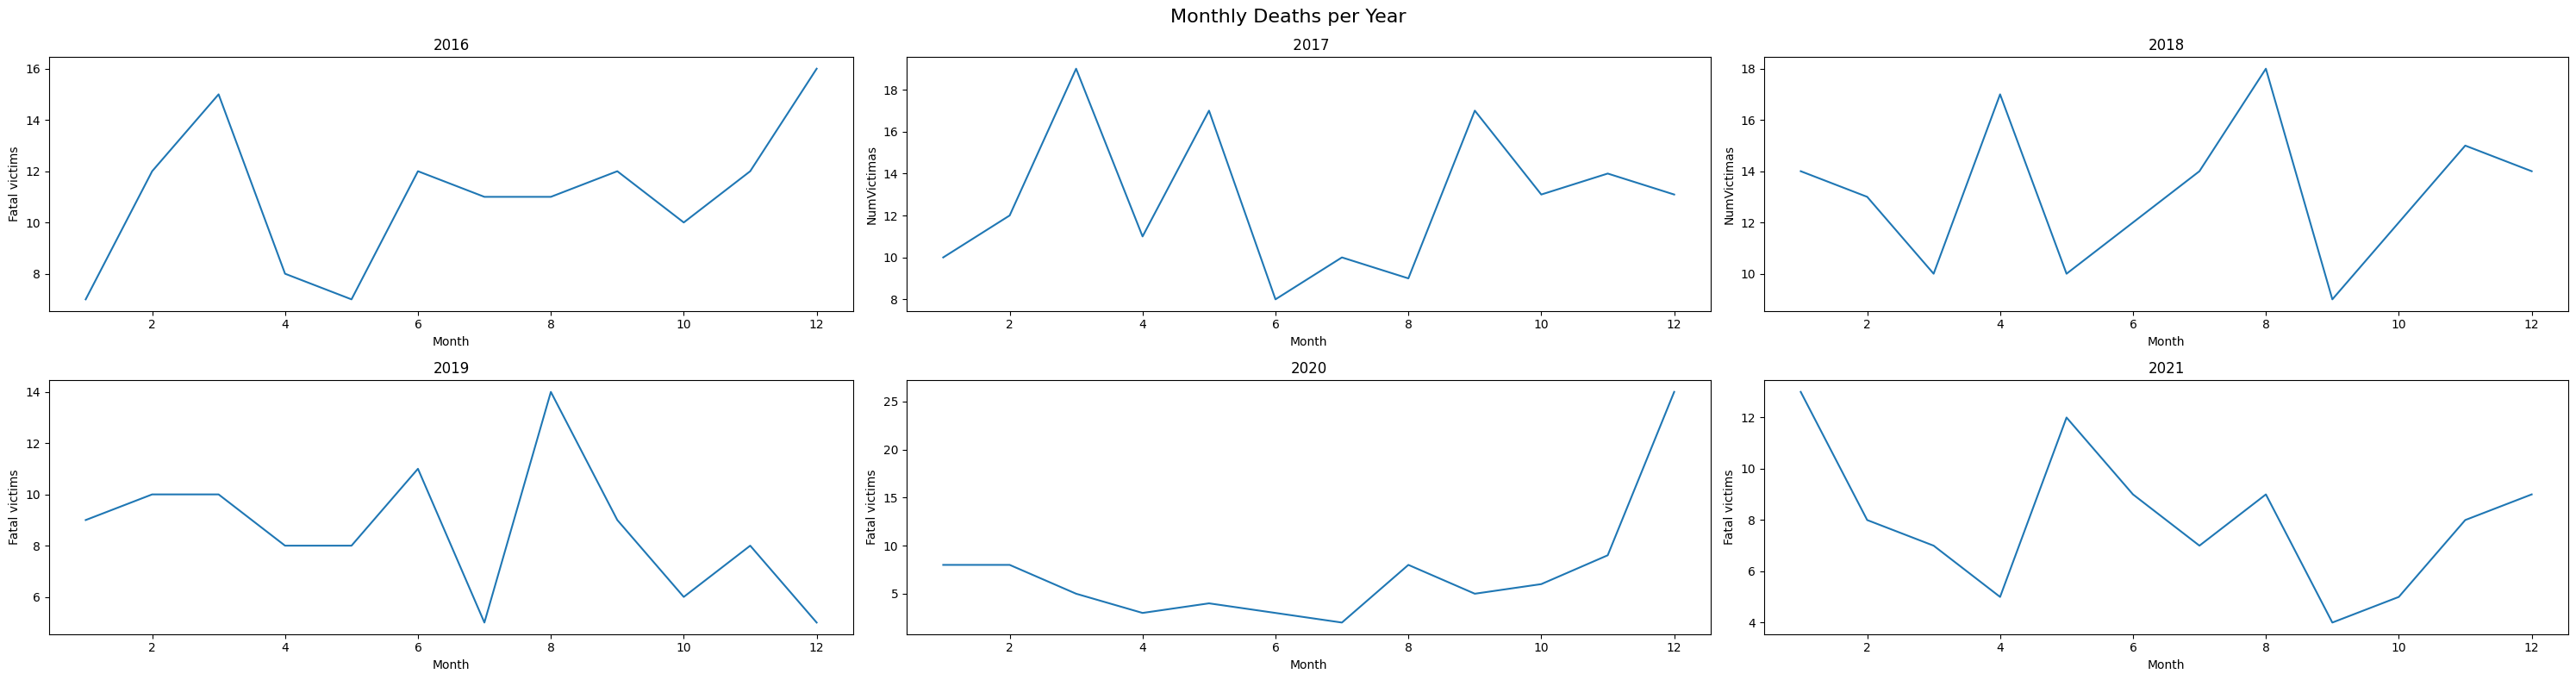

In [ ]:
t.FatalVictimsperyear(df)

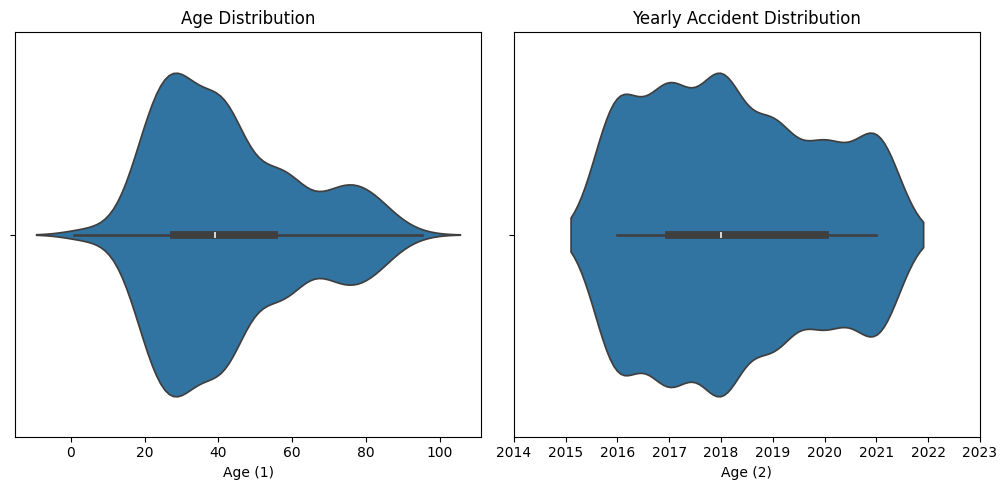

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.violinplot(ax=axes[0], x='Edad', data=df)
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age (1)')



plt.tight_layout() 
plt.show()

In the graphs above, you can see that, on average, the highest number of accidents occurred among 25- to 30-year-olds, and most of them occurred between 2017 and 2018.

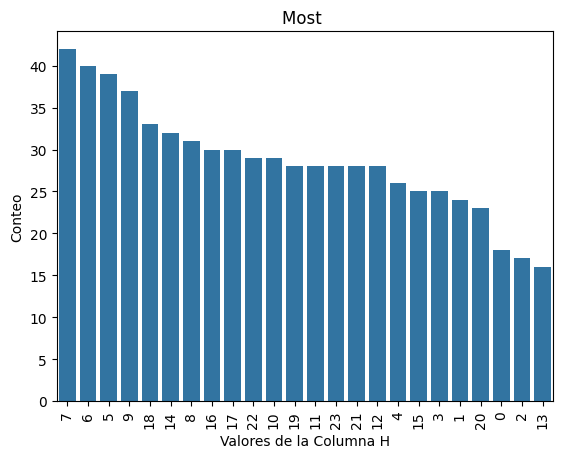

In [ ]:
sns.countplot(data=df, x='H', order=df['H'].value_counts().index)
plt.title('Most ')
plt.xlabel('Valores de la Columna H')
plt.ylabel('Conteo')

# Rotar etiquetas del eje x para una mejor visualización si es necesario
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()